### Mushroom Classification Using Machine Learning
#### The main objective of this project is to  correctly classify if a Mushroom is Edible or Poisonous by its Specifications Using different Classifiers

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df=pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


#### But we cant see all our columns(23).So What do we do?
##### We will set a parameter to display all columns as you will see below

In [38]:
pd.set_option('display.max_columns',None)

In [39]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [40]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,o,c,l


##### From the Dataset,We can see that all columns consist of categorical Data and from the directive,Class is our Target variable...Where P is poisonous and E is edible

In [41]:
df.shape

(8124, 23)

In [42]:
print('Number of rows is',df.shape[0])
print('Number of columns is',df.shape[1])

Number of rows is 8124
Number of columns is 23


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [44]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [45]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


#### Let's do some Data Manipulation by converting our categorical data into numerical data because Machine Learning Algorithm Can Understand Only numerical Values ,remember this is an object datatype because it's a categorical data.We are going to use Label encoder.

In [46]:
df=df.astype('category')

In [47]:
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

#### After Converting our Datatypes to category,we can then proceed to use label encoder from sklearn

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
    df[column]=le.fit_transform(df[column])

In [49]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


#### Now we have successfully converted our categorical values to numerical using sklearn label encoder
#### Now let us store our variables(independent and dependent) into Matix X and Vector y respectively

In [50]:
X = df.drop('class',axis = 1)
y = df['class']

#### Now let's apply PCA
##### What is PCA?
##### Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.
##### The key aim of PCA is to reduce the number of variables of a data set, while preserving as much information as possible.
##### The advantages include
##### - PCA will help you remove all the features that are correlated, a phenomenon known as multi-collinearity. Finding features that are correlated is time consuming,         especially if the number of features is large.
##### - With the number of features reduced with PCA, the time taken to train your model is now significantly reduced.
##### - By removing the unnecessary features in your dataset, PCA helps to overcome overfitting.

In [51]:
from sklearn.decomposition import PCA
pca1=PCA(n_components=7)
pca_fit = pca1.fit_transform(X)

In [52]:
pca1.explained_variance_ratio_

array([0.33758733, 0.16581098, 0.12285821, 0.06796611, 0.05831173,
       0.05092539, 0.04670841])

##### It has produced 7 components because we input 7.

In [53]:
sum(pca1.explained_variance_ratio_)

0.8501681635086221

##### We can see that after the sum of our 7 components pca1,we have 85% information retained from our dataset

#### It's time for train_test_split

In [54]:
from sklearn.model_selection import train_test_split

##### After applying PCa ,our X value for training will automatically become pca_fit

In [55]:
X_train,X_test,y_train,y_test=train_test_split(pca_fit,y,test_size=0.2,random_state=42)

##### Remember this is a classification problem.We will now import and train our classification models

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

svc = SVC()
svc.fit(X_train,y_train)

dt =DecisionTreeClassifier()
dt.fit(X_train,y_train)


rf = RandomForestClassifier()
rf.fit(X_train,y_train)

gbr = GradientBoostingClassifier()
gbr.fit(X_train,y_train)


GradientBoostingClassifier()

#### It's time to predict on Test Data

In [58]:
y_pred1=lr.predict(X_test)
y_pred2=knn.predict(X_test)
y_pred3=svc.predict(X_test)
y_pred4=dt.predict(X_test)
y_pred5=rf.predict(X_test)
y_pred6=gbr.predict(X_test)

#### Let's Evaluate the performance of the algorithms

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
print('ACC LR',accuracy_score(y_test,y_pred1))
print('ACC KNN',accuracy_score(y_test,y_pred2))
print('ACC SVC',accuracy_score(y_test,y_pred3))
print('ACC DT',accuracy_score(y_test,y_pred4))
print('ACC RF',accuracy_score(y_test,y_pred5))
print('ACC GBR',accuracy_score(y_test,y_pred6))

ACC LR 0.8344615384615385
ACC KNN 0.9833846153846154
ACC SVC 0.952
ACC DT 0.9778461538461538
ACC RF 0.9963076923076923
ACC GBR 0.9384615384615385


##### We will need create this into pandas dataframe

In [61]:
final_pred=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'],
                        'ACC':[accuracy_score(y_test,y_pred1)*100,
                              accuracy_score(y_test,y_pred2)*100,
                              accuracy_score(y_test,y_pred3)*100,
                              accuracy_score(y_test,y_pred4)*100,
                              accuracy_score(y_test,y_pred5)*100,
                              accuracy_score(y_test,y_pred6)*100]})

In [62]:
final_pred

,Models,ACC
0,LR,83.446154
1,SVC,98.338462
2,KNN,95.200000
3,DT,97.784615
4,RF,99.630769
5,GB,93.846154


C:\Users\DAMMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


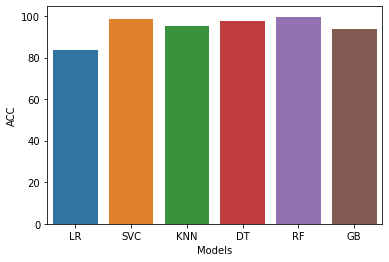

In [63]:
sns.barplot(final_pred['Models'],final_pred['ACC'])
plt.show()

##### From our plot,it is obvious that Random Forest Classifier is the most accurate model to use in predicting.We will have to train our entire pca dataset on random forest classifier and save to joblib

In [64]:
rf = RandomForestClassifier()
rf.fit(pca_fit,y)

RandomForestClassifier()

In [65]:
import joblib

In [66]:
joblib.dump(rf,'My_Mushroom_prediction')

['My_Mushroom_prediction']

In [67]:
model=joblib.load('My_Mushroom_prediction')

##### Let's do a test of our prediction with random independent values below

In [68]:
p=model.predict(pca1.transform([[5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5]]))
if p[0]==1:
    print('Poisonous Mushroom')
else:
    print('Mushroom is Edible')

Poisonous Mushroom


##### Now,let's Create a GUI for automation

In [70]:
from tkinter import*
import joblib
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=int(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    p14=int(e14.get())
    p15=int(e15.get())
    p16=int(e16.get())
    p17=int(e17.get())
    p18=int(e18.get())
    p19=int(e19.get())
    p20=int(e20.get())
    p21=int(e21.get())
    p22=int(e22.get())
    
    model = joblib.load('My_Mushroom_prediction')
    result=model.predict(pca1.transform([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22]]))
    if result==0:
        Label(master,text="Mushroom is Edible").grid(row=31)
    else:
        Label(master,text="Poisonous Mushroom").grid(row=31)
        
master=Tk()
master.title("Mushroom Classification and Prediction Using Machine Learning")

label = Label(master,text="Mushroom Classification Using Machine Learning"
                         ,bg = "black",fg="white").\
                             grid(row=0,columnspan=2)


Label(master,text="cap-shape :(cap-shape: bell=0,conical=1,convex=5,flat=2, knobbed=3,sunken=4)").grid(row=1)
Label(master,text="cap-surface:(fibrous=0,grooves=1,scaly=3,smooth=2)").grid(row=2)
Label(master,text="cap-color:(brown=4,buff=0,cinnamon=1,gray=3,green=r, \
pink=5,purple=6,red=2,white=7,yellow=8)").grid(row=3)
Label(master,text="bruises:(bruises=1,no=0)").grid(row=4)
Label(master,text="odor:(almond=0,anise=3,creosote=1,fishy=8,foul=2,\
musty=4,none=5,pungent=6,spicy=7 \
)").grid(row=5)
Label(master,text="gill-attachment:(attached=0,descending=1,free=2,notched=3)").grid(row=6)
Label(master,text="gill-spacing:(close=0,crowded=2,distant=1 \
)").grid(row=7)
Label(master,text="gill-size:(road=0,narrow=1)").grid(row=8)
Label(master,text="gill-color:(black=4,brown=5,buff=0,chocolate=3,gray=2,green=8,orange=6,pink=7,purple=9,red=1,white=10,yellow=11)").grid(row=9)
Label(master,text="stalk-shape:(enlarging=0,tapering=1)").grid(row=10)
Label(master,text="stalk-root:( bulbous=0,club=1,cup=5,equal=2,rhizomorphs=4, \
rooted=3,missing=6)").grid(row=11)
Label(master,text="stalk-surface-above-ring:(fibrous=0,scaly=3,silky=1,smooth=2)").grid(row=12)
Label(master,text="stalk-surface-below-ring:(fibrous=0,scaly=3,silky=1,smooth=2 \
)").grid(row=13)
Label(master,text="stalk-color-above-ring:(brown=4,buff=0,cinnamon=1,gray=3, \
orange=5,pink=6,red=2,white=7,yellow=8)").grid(row=14)
Label(master,text="stalk-color-below-ring:(brown=4,buff=0,cinnamon=1,gray=3, \
orange=5,pink=6,red=2,white=7,yellow=8)").grid(row=15)
Label(master,text="veil-type:(partial=0,universal=1)").grid(row=16)
Label(master,text="veil-color:(brown=0,orange=1,white=2,yellow=3)").grid(row=17)
Label(master,text="ring-number:(none=0,one=1,two=2)").grid(row=18)
Label(master,text="ring-type:(cobwebby=0,evanescent=1,flaring=2,large=3,\
none=4,pendant=5,sheathing=6,zone=7)").grid(row=19)
Label(master,text="spore-print-color:(black=2,brown=3,buff=0,chocolate=1, \
green=5,orange=4,purple=6,white=7,yellow=8 \
)").grid(row=20)
Label(master,text="population:(abundant=0,clustered=1,numerous=2,scattered=3, \
# several=4,solitary=5)").grid(row=21)
Label(master,text="habitat:(grasses=1,leaves=2,meadows=3,paths=4,urban=5,\
# waste=6,woods=0)").grid(row=22)


e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)
e7=Entry(master)
e8=Entry(master)
e9=Entry(master)
e10=Entry(master)
e11=Entry(master)
e12=Entry(master)
e13=Entry(master)
e14=Entry(master)
e15=Entry(master)
e16=Entry(master)
e17=Entry(master)
e18=Entry(master)
e19=Entry(master)
e20=Entry(master)
e21=Entry(master)
e22=Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)
e12.grid(row=12,column=1)
e13.grid(row=13,column=1)
e14.grid(row=14,column=1)
e15.grid(row=15,column=1)
e16.grid(row=16,column=1)
e17.grid(row=17,column=1)
e18.grid(row=18,column=1)
e19.grid(row=19,column=1)
e20.grid(row=20,column=1)
e21.grid(row=21,column=1)
e22.grid(row=22,column=1)

Button(master,text="Predict",command=show_entry_fields).grid()


mainloop()